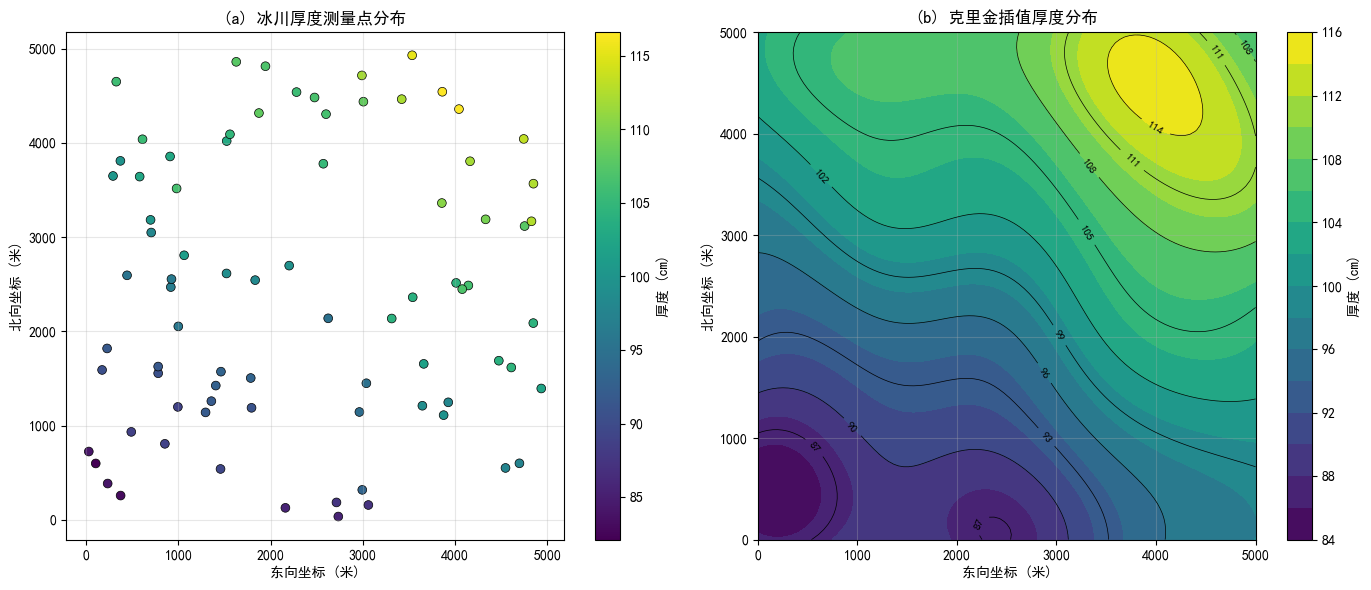

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging  # 确保拼写正确

# 设置中文字体和负号显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 导入冰川厚度数据
glacier_df = pd.read_excel("E:\\Mathematics_Modeling_study\\2025MCM\\Data\\glacier_data.xlsx")

# 创建插值网格
grid_size = 100  # 100x100 网格
grid_x = np.linspace(0, 5000, grid_size)
grid_y = np.linspace(0, 5000, grid_size)

# 执行普通克里金插值
OK = OrdinaryKriging(
    glacier_df["x"], glacier_df["y"], glacier_df["thickness"],
    variogram_model='gaussian',
    variogram_parameters={'sill': 4, 'range': 2000, 'nugget': 0.8},
    verbose=False
)

# 生成插值结果
z, ss = OK.execute('grid', grid_x, grid_y)

# 可视化设置
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 原始测量点分布
sc0 = ax[0].scatter(glacier_df["x"], glacier_df["y"], c=glacier_df["thickness"], cmap='viridis', 
                   s=40, edgecolor='k', linewidth=0.5)
plt.colorbar(sc0, ax=ax[0], label="厚度 (cm)")
ax[0].set_title("(a) 冰川厚度测量点分布")
ax[0].set_xlabel("东向坐标 (米)")
ax[0].set_ylabel("北向坐标 (米)")
ax[0].grid(True, alpha=0.3)

# 插值结果
contour = ax[1].contourf(grid_x, grid_y, z, levels=15, cmap='viridis')
plt.colorbar(contour, ax=ax[1], label="厚度 (cm)")
ax[1].set_title("(b) 克里金插值厚度分布")
ax[1].set_xlabel("东向坐标 (米)")
ax[1].set_ylabel("北向坐标 (米)")
ax[1].grid(True, alpha=0.3)

# 添加等高线
CS = ax[1].contour(grid_x, grid_y, z, levels=10, colors='k', linewidths=0.5)
ax[1].clabel(CS, inline=True, fontsize=8, fmt='%1.0f')

# 显示图形
plt.tight_layout()
plt.show()